In [16]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed'
os.chdir(directory)

In [17]:
gendf1 = pd.DataFrame
contentlist = []
for path in glob.glob("Generation/generationdata_*.csv"):
    df = pd.read_csv(path,index_col=None, header=0)
    contentlist.append(df)
    gendf1 = pd.concat(contentlist)

middf = gendf1[(gendf1.Generation ==4)]
middf = middf[middf.Generation_Time <100]

In [18]:
gendf =  pd.DataFrame
contentlist = []
for path in glob.glob("MiddleGeneration/middlegenerationdata_*.csv"):
    df = pd.read_csv(path,index_col=None, header=0)
    contentlist.append(df)
    gendf = pd.concat(contentlist)


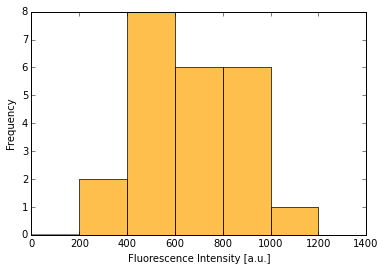

In [19]:
gen1df = gendf1[(gendf1.Generation ==1)]
ax = gen1df.Fluorescence_Intensity.hist( color='Orange', bins = [0,200,400,600,800,1000,1200,1400],alpha=0.7)
ax.set_xlabel('Fluorescence Intensity [a.u.]')
ax.set_ylabel("Frequency")
ax.grid(False)
plt.savefig(directory+'/Graphs/Total_Analysis/FluorescenceHistogram.pdf')

In [28]:
gendf.Elongation_Rate.std(ddof=1)/gendf.Elongation_Rate.mean()

0.25685022196505286

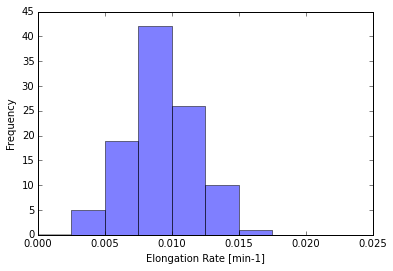

In [20]:
ax= gendf.Elongation_Rate.hist(color = 'blue', alpha= 0.5,bins=[0, 0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02])
ax.set_xlabel('Elongation Rate [min-1]')
ax.set_ylabel('Frequency')
ax.grid(False)
#ax.set_title('Distribution of Elongation Rate')
plt.savefig(directory+'/Graphs/Total_Analysis/ERHistogram.pdf')

In [21]:
print('Total Generations: '+ str(len(gendf)))
print('Number of 3rd and 4th Generations: '+ str(len(middf)))

Total Generations: 103
Number of 3rd and 4th Generations: 22


/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


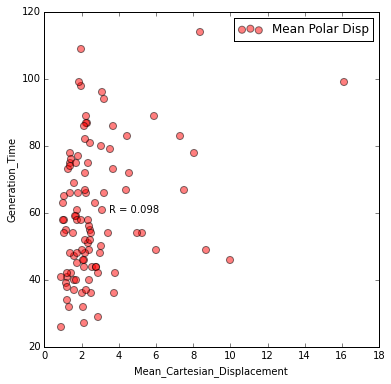

In [22]:
ax = gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Generation_Time',alpha=0.5,label = 'Mean Polar Disp', color = 'red', s =50, figsize=(6,6))
corr = ((1-(gendf.Generation_Time.corr(gendf.Mean_Polar_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.3f'%corr, (3.5,60))
#for i, txt in enumerate(gendf1.Fluorescence_Intensity):
    #ax.annotate(txt, (gendf1.Mean_Polar_Displacement.iloc[i],gendf1.Elongation_Rate.iloc[i]))
#plt.savefig(directory+'/Graphs/Total_Analysis/ER-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


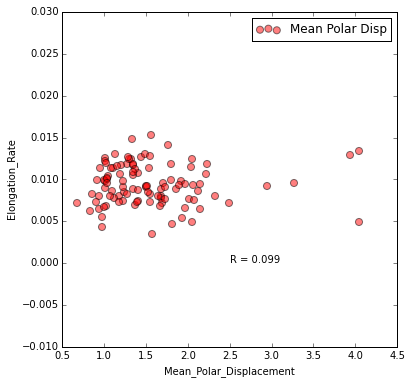

In [23]:
ax = gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate',alpha=0.5,label = 'Mean Polar Disp', s =50,color = 'red', figsize=(6,6))
corr = ((1-(gendf.Elongation_Rate.corr(gendf.Mean_Polar_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.3f'%corr, (2.5,0.000))
#for i, txt in enumerate(gendf1.Fluorescence_Intensity):
    #ax.annotate(txt, (gendf1.Mean_Polar_Displacement.iloc[i],gendf1.Elongation_Rate.iloc[i]))
plt.savefig(directory+'/Graphs/Total_Analysis/ER-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


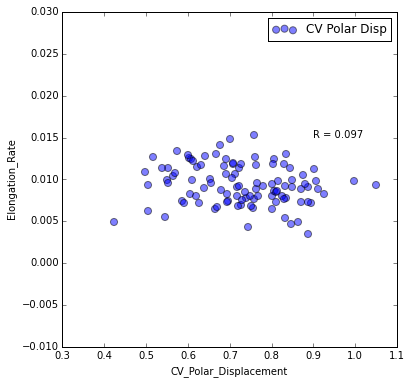

In [24]:
ax = gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate',alpha=0.5,label = 'CV Polar Disp', s =50, color = 'blue', figsize=(6,6))
cor2 = ((1-(gendf.Elongation_Rate.corr(gendf.CV_Polar_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.3f'%cor2, (0.9, 0.015))
plt.savefig(directory+'/Graphs/Total_Analysis/ER-CVPolar-Scatter.pdf')

In [25]:
gendfdict = {}
gencorrdict = {}
gencorrdictcv = {}
for x in gendf.Generation[1:6]:
    gendfdict[x] =  gendf[(gendf.Generation ==x)]
    gencorrdict[x] =  ((1-(gendfdict[x].Elongation_Rate.corr(gendfdict[x].Mean_Polar_Displacement))**2)/len(gendfdict[x]))**(0.5)
    gencorrdictcv[x] =  ((1-(gendfdict[x].Elongation_Rate.corr(gendfdict[x].CV_Polar_Displacement))**2)/len(gendfdict[x]))**(0.5)

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


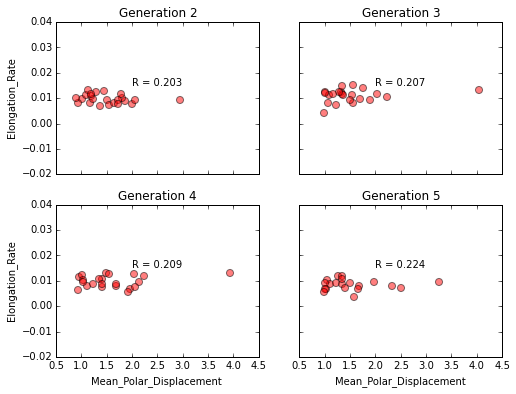

In [26]:
fig, axes = plt.subplots(sharex = True,sharey = True,  nrows=2, ncols=2)

gendfdict[2].plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 2', alpha=0.5, s= 50, color = 'red', figsize=(8,6),ax=axes[0,0])
gendfdict[3].plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 3', alpha=0.5,s= 50, color = 'red',ax=axes[0,1])
gendfdict[4].plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 4', alpha=0.5,s= 50, color = 'red',ax=axes[1,0])
gendfdict[5].plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 5', alpha=0.5,s= 50, color = 'red',ax=axes[1,1])

axes[0,0].annotate('R = %.3f'%gencorrdict[2], (2.0, 0.015))
axes[0,1].annotate('R = %.3f'%gencorrdict[3], (2.0, 0.015))
axes[1,0].annotate('R = %.3f'%gencorrdict[4], (2.0, 0.015))
axes[1,1].annotate('R = %.3f'%gencorrdict[5], (2.0, 0.015))

plt.savefig(directory+'/Graphs/Total_Analysis/Gen-ER-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


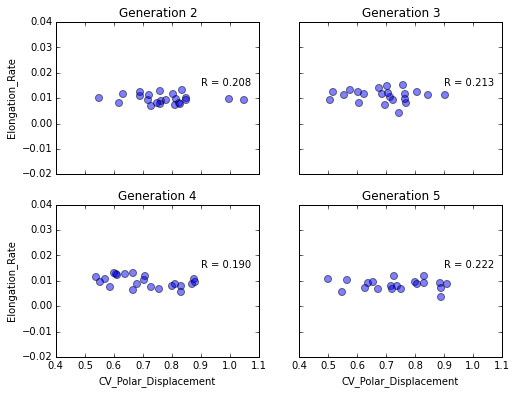

In [27]:
fig, axes = plt.subplots(sharex = True,sharey = True,  nrows=2, ncols=2)

gendfdict[2].plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 2', alpha=0.5,s= 50, color = 'blue', figsize=(8,6),ax=axes[0,0])
gendfdict[3].plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 3', alpha=0.5,s= 50, color = 'blue',ax=axes[0,1])
gendfdict[4].plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 4', alpha=0.5,s= 50, color = 'blue',ax=axes[1,0])
gendfdict[5].plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate', title = 'Generation 5', alpha=0.5,s= 50, color = 'blue',ax=axes[1,1])

axes[0,0].annotate('R = %.3f'%gencorrdictcv[2], (0.9, 0.015))
axes[0,1].annotate('R = %.3f'%gencorrdictcv[3], (0.9, 0.015))
axes[1,0].annotate('R = %.3f'%gencorrdictcv[4], (0.9, 0.015))
axes[1,1].annotate('R = %.3f'%gencorrdictcv[5], (0.9, 0.015))

plt.savefig(directory+'/Graphs/Total_Analysis/Gen-ER-CVPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


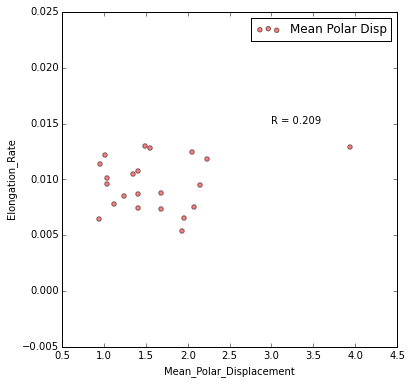

In [83]:
ax = middf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate',alpha=0.5,color = 'red', label = 'Mean Polar Disp', figsize=(6,6))
corr = ((1-(middf.Elongation_Rate.corr(middf.Mean_Polar_Displacement))**2)/len(middf))**(0.5)
ax.annotate('R = %.3f'%corr, (3.0, 0.015))
#for i, txt in enumerate(middf.Generation_Time):
 #   ax.annotate(txt, (middf.Mean_Polar_Displacement.iloc[i],middf.Elongation_Rate.iloc[i]))
plt.savefig(directory+'/Graphs/Total_Analysis/Gen34-ER-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


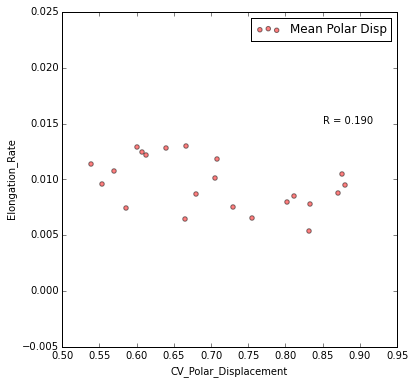

In [9]:
ax = middf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate',alpha=0.5,color = 'red', label = 'Mean Polar Disp', figsize=(6,6))
corr = ((1-(middf.Elongation_Rate.corr(middf.CV_Polar_Displacement))**2)/len(middf))**(0.5)
ax.annotate('R = %.3f'%corr, (0.85, 0.015))
#for i, txt in enumerate(middf.Generation_Time):
 #   ax.annotate(txt, (middf.Mean_Polar_Displacement.iloc[i],middf.Elongation_Rate.iloc[i]))
plt.savefig(directory+'/Graphs/Total_Analysis/Gen34-ER-CVPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


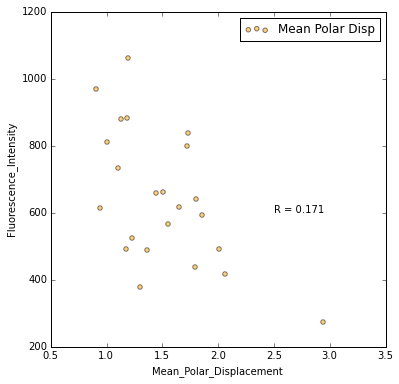

In [29]:
gen2df = gendf[(gendf.Generation ==2)]
ax = gen2df.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Fluorescence_Intensity',alpha=0.5,label = 'Mean Polar Disp', color = 'orange', figsize=(6,6))
corr2 = ((1-(gen2df.Fluorescence_Intensity.corr(gen2df.Mean_Polar_Displacement))**2)/len(gen1df))**(0.5)
ax.annotate('R = %.3f'%corr2, (2.5, 600))
plt.savefig(directory+'/Graphs/Total_Analysis/Gen2-Fluorescence-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


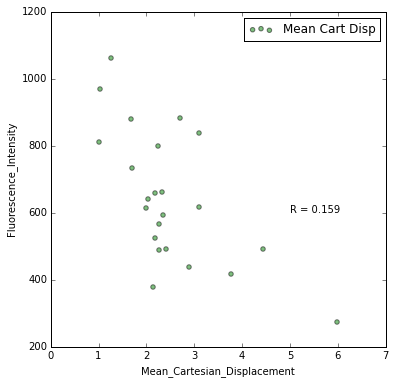

In [24]:
ax = gen2df.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Fluorescence_Intensity',alpha=0.5,label = 'Mean Cart Disp', color = 'green', figsize=(6,6))
corr3 = ((1-(gen2df.Fluorescence_Intensity.corr(gen2df.Mean_Cartesian_Displacement))**2)/len(gen2df))**(0.5)
ax.annotate('R = %.3f'%corr3, (5, 600))

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


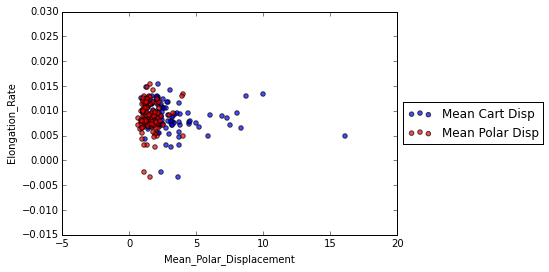

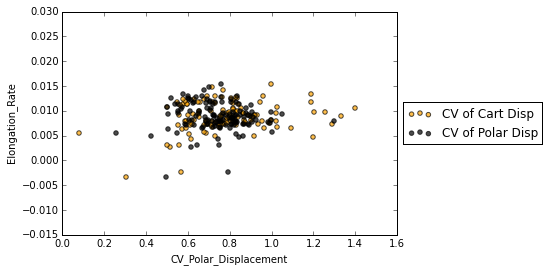

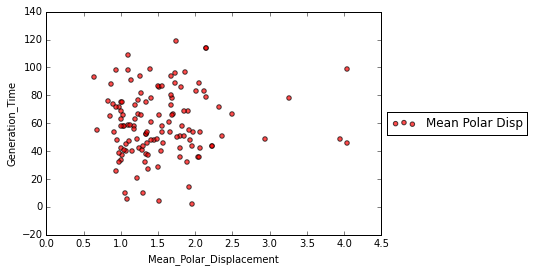

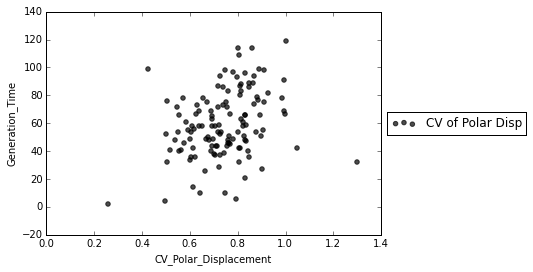

In [16]:
ax = gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'Mean Cart Disp',color='Blue')
gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate',alpha=0.7,label = 'Mean Polar Disp', color='Red', ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2= gendf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'CV of Cart Disp', color='Orange')
gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'CV of Polar Disp', color='Black',ax=ax2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax3=gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Generation_Time',alpha=0.7,label = 'Mean Polar Disp', color='Red')
#gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Generation_Time', alpha=0.7,label = 'Mean Cart Disp',color='Blue', ax=ax3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4= gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Generation_Time', alpha=0.7,label = 'CV of Polar Disp', color='Black')
#gendf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Generation_Time', alpha=0.7,label = 'CV of Cart Disp', color='Orange',ax=ax4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108d38e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ab85898>]], dtype=object)

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


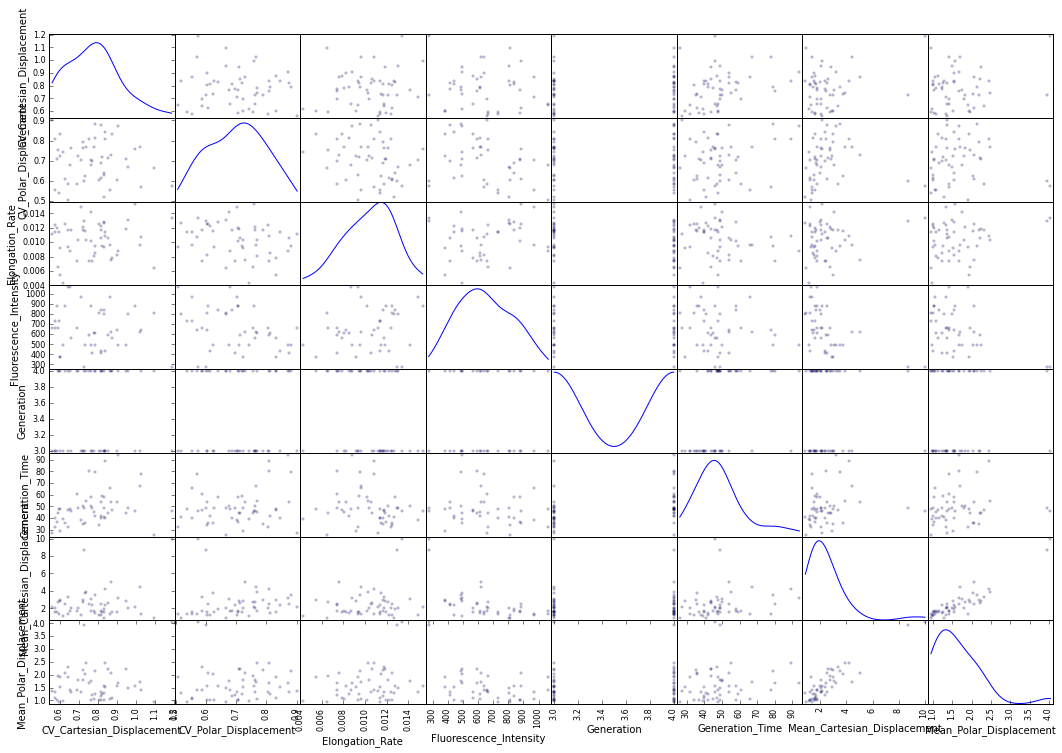

In [17]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(middf, alpha=0.2, figsize=(18, 12), diagonal='kde')